<a href="https://colab.research.google.com/github/minkyeongk/DL_TensorFlow_Developer/blob/main/2.%20Convolutional%20Neural%20Networks%20in%20TensorFlow/week_4/week_4_notebook_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiclass clssifier 
rock-scissor-paper example 

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-01-13 17:01:43--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  35.5MB/s    in 5.4s    

2021-01-13 17:01:49 (35.5 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-01-13 17:01:49--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 173.194.79.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to

In [2]:
import os
import zipfile 
# unzip data
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [3]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock07-k03-019.png', 'rock06ck02-034.png', 'rock02-024.png', 'rock01-065.png', 'rock02-027.png', 'rock05ck01-020.png', 'rock06ck02-043.png', 'rock01-018.png', 'rock07-k03-074.png', 'rock05ck01-104.png']
['paper05-038.png', 'paper05-021.png', 'paper03-015.png', 'paper02-079.png', 'paper02-001.png', 'paper01-083.png', 'paper03-000.png', 'paper04-012.png', 'paper03-056.png', 'paper02-059.png']
['scissors01-078.png', 'scissors04-068.png', 'scissors03-110.png', 'testscissors01-089.png', 'scissors04-098.png', 'scissors02-015.png', 'scissors03-082.png', 'scissors03-040.png', 'scissors01-001.png', 'scissors04-024.png']


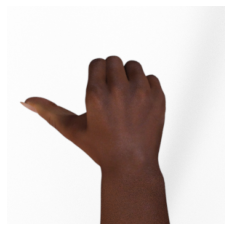

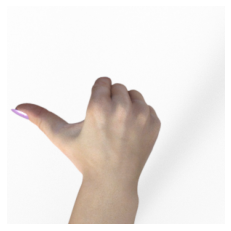

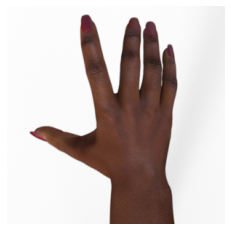

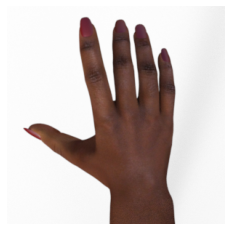

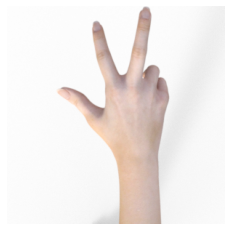

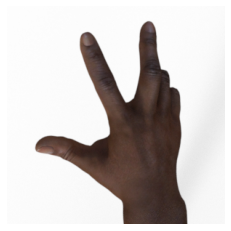

In [4]:
%matplotlib inline 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

pic_index = 2
# 디렉토리 속 이미지 출력 
next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2: pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2: pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2: pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()


In [5]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image 
from keras_preprocessing.image import ImageDataGenerator

train_dir = '/tmp/rps'
train_gene = ImageDataGenerator(rescale=1/255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

val_dir = '/tmp/rps-test-set'
val_gene = ImageDataGenerator(rescale=1/255)

train_generator = train_gene.flow_from_directory(
    train_dir,
    batch_size=126,
    target_size=(150,150),
    class_mode='categorical'
)

val_generator = val_gene.flow_from_directory(
    val_dir,
    batch_size=126, 
    target_size=(150,150),
    class_mode='categorical'
)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history=model.fit(train_generator,
                  steps_per_epoch=20,
                  epochs=25,
                  validation_data=val_generator,
                  validation_steps=3,
                  verbose=1)

model.save('rps.h5')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

<function matplotlib.pyplot.show>

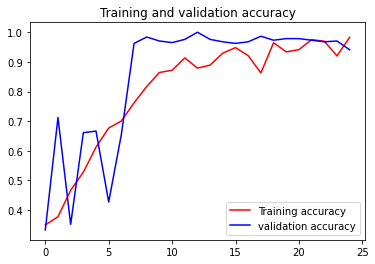

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show

In [16]:
import numpy as np 
from google.colab import files 
from keras.preprocessing import image 

uploaded=files.upload()

for fn in uploaded.keys():
  path=fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)


Saving 가위.jfif to 가위.jfif
가위.jfif
[[0. 0. 1.]]
